In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file=pd.read_csv('simple_linear_data.csv')

In [3]:
file

,G2,G3
0,30,30
1,25,30
2,40,50
3,70,75
4,50,50
...,...,...
390,45,45
391,80,80
392,40,35
393,60,50


In [4]:
file.insert(0,'Weights',1)

In [5]:
file

,Weights,G2,G3
0,1,30,30
1,1,25,30
2,1,40,50
3,1,70,75
4,1,50,50
...,...,...,...
390,1,45,45
391,1,80,80
392,1,40,35
393,1,60,50


In [6]:
X=np.array(file[file.columns[:2]])
X

array([[ 1, 30],
       [ 1, 25],
       [ 1, 40],
       [ 1, 70],
       [ 1, 50],
       [ 1, 75],
       [ 1, 60],
       [ 1, 25],
       [ 1, 90],
       [ 1, 75],
       [ 1, 40],
       [ 1, 60],
       [ 1, 70],
       [ 1, 50],
       [ 1, 80],
       [ 1, 70],
       [ 1, 70],
       [ 1, 50],
       [ 1, 25],
       [ 1, 50],
       [ 1, 70],
       [ 1, 75],
       [ 1, 75],
       [ 1, 65],
       [ 1, 45],
       [ 1, 45],
       [ 1, 60],
       [ 1, 80],
       [ 1, 55],
       [ 1, 60],
       [ 1, 55],
       [ 1, 80],
       [ 1, 80],
       [ 1, 50],
       [ 1, 70],
       [ 1, 35],
       [ 1, 80],
       [ 1, 80],
       [ 1, 60],
       [ 1, 65],
       [ 1, 50],
       [ 1, 60],
       [ 1, 90],
       [ 1, 40],
       [ 1, 50],
       [ 1, 40],
       [ 1, 60],
       [ 1, 95],
       [ 1, 75],
       [ 1, 35],
       [ 1, 65],
       [ 1, 65],
       [ 1, 55],
       [ 1, 50],
       [ 1, 65],
       [ 1, 45],
       [ 1, 75],
       [ 1, 75],
       [ 1, 50

In [7]:
Y=np.array(file[file.columns[-1:]])
Y

array([[ 30],
       [ 30],
       [ 50],
       [ 75],
       [ 50],
       [ 75],
       [ 55],
       [ 30],
       [ 95],
       [ 75],
       [ 45],
       [ 60],
       [ 70],
       [ 55],
       [ 80],
       [ 70],
       [ 70],
       [ 50],
       [ 25],
       [ 50],
       [ 75],
       [ 75],
       [ 80],
       [ 60],
       [ 40],
       [ 40],
       [ 55],
       [ 75],
       [ 55],
       [ 55],
       [ 60],
       [ 85],
       [ 80],
       [ 60],
       [ 75],
       [ 30],
       [ 90],
       [ 75],
       [ 55],
       [ 65],
       [ 55],
       [ 60],
       [ 90],
       [ 55],
       [ 45],
       [ 30],
       [ 55],
       [100],
       [ 70],
       [ 35],
       [ 65],
       [ 65],
       [ 50],
       [ 55],
       [ 65],
       [ 50],
       [ 75],
       [ 75],
       [ 45],
       [ 80],
       [ 55],
       [ 55],
       [ 45],
       [ 45],
       [ 50],
       [ 75],
       [ 60],
       [ 30],
       [ 40],
       [ 80],
       [ 75],
      

In [20]:
X_shape = X.shape
X_type  = type(X)
y_shape = Y.shape
y_type  = type(Y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(395, 2)
y: Type-<class 'numpy.ndarray'>, Shape-(395, 1)


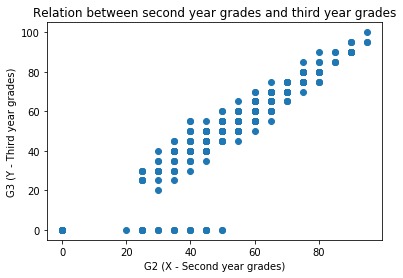

In [9]:
plt.scatter(X[:,1],Y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

In [19]:
def predict(X, weights):
    y_pred = np.dot(X,weights)
    
    assert (y_pred.shape==(X.shape[0],1))
    
    return y_pred

In [22]:
def mean_squared_error(y_true, y_pred) : 
    m = y_true.shape[0]
    loss = (1 / (2 * m)) * np.sum((y_true - y_pred) ** 2)
    return loss

In [23]:
def gradient(X, y_true, y_pred):

    grad = np.zeros((2,1))
    m = X.shape[0]
    grad[0][0] = (2 / m) * np.sum(np.dot(X[:, 0], (y_pred - y_true)))
    grad[1][0] = (2 / m) * np.sum(np.dot(X[:, 1], (y_pred - y_true)))
    
    return grad

In [51]:
def gradient_descent(X, y, learning_rate=0.0001, max_iterations=100):
    weights = np.random.rand(2,1) 
    losses  = []
    y_true = y.reshape(-1, 1)
    for i in range(max_iterations):
        y_pred = predict(X, weights)
        losses.append(mean_squared_error(y_true, y_pred))
        grad = gradient(X, y_true, y_pred)
        weights[0][0] -= learning_rate * grad[0][0]
        weights[1][0] -= learning_rate * grad[1][0]   
    
    return weights, losses

In [52]:
weights = np.random.rand(2, 1)
l = []
y_true = Y.reshape(-1, 1)
for i in range(10):
    y_pred = predict(X, weights)
    l.append(mean_squared_error(y_true, y_pred))
    grad = gradient(X, y_true, y_pred)
    weights[0][0] -= 0.0001 * grad[0][0]
    weights[1][0] -= 0.0001 * grad[1][0]
    
    print(l[i])
    

845.15168939351
150.65416030521928
62.974328169531624
51.90471379235622
50.50707420602677
50.33051320966528
50.308112350803185
50.30517408291269
50.30469295539088
50.30452204457292


In [53]:
optimal_weights, losses = gradient_descent(X, Y)

In [54]:
print("Mean squared error:", losses[-1])

Mean squared error: 50.60594455097147


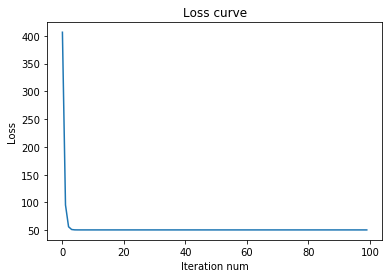

In [55]:
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [56]:
y_pred = predict(X, optimal_weights)

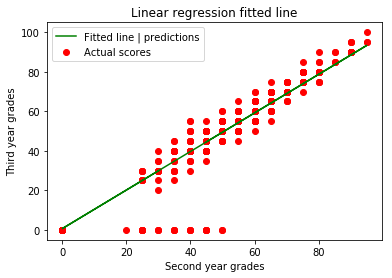

In [57]:
plt.scatter(X[:,1], Y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()

# Task 2

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [119]:
data=pd.read_csv('multiple_linear_data.csv')

In [120]:
orig_cols = data.columns

In [121]:
data

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,U,GT3,course,2,0,yes,no,no,no,yes,no,no,3,4,3,6,25,30,30
1,17,U,GT3,course,2,0,no,yes,no,no,yes,yes,no,3,3,3,4,25,25,30
2,15,U,LE3,other,2,3,yes,no,yes,no,yes,yes,no,3,2,3,10,35,40,50
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70,75
4,16,U,GT3,home,2,0,no,yes,yes,no,yes,no,no,3,2,5,4,30,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,LE3,course,2,2,no,yes,yes,no,yes,no,no,5,4,4,11,45,45,45
391,17,U,LE3,course,1,0,no,no,no,no,yes,yes,no,4,5,2,3,70,80,80
392,21,R,GT3,course,1,3,no,no,no,no,yes,no,no,5,3,3,3,50,40,35
393,18,R,LE3,course,1,0,no,no,no,no,yes,yes,no,4,1,5,0,55,60,50


In [122]:
data.isnull().sum()

age           0
address       0
famsize       0
reason        0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
higher        0
internet      0
romantic      0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [123]:
label_encoder = preprocessing.LabelEncoder()

In [124]:
cat_list=list(orig_cols[1:3])+list(orig_cols[6:13])

In [125]:
for i in cat_list:
    data[i]=label_encoder.fit_transform(data[i])


In [126]:
data

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,1,0,course,2,0,1,0,0,0,1,0,0,3,4,3,6,25,30,30
1,17,1,0,course,2,0,0,1,0,0,1,1,0,3,3,3,4,25,25,30
2,15,1,1,other,2,3,1,0,1,0,1,1,0,3,2,3,10,35,40,50
3,15,1,0,home,3,0,0,1,1,1,1,1,1,2,2,5,2,75,70,75
4,16,1,0,home,2,0,0,1,1,0,1,0,0,3,2,5,4,30,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,1,course,2,2,0,1,1,0,1,0,0,5,4,4,11,45,45,45
391,17,1,1,course,1,0,0,0,0,0,1,1,0,4,5,2,3,70,80,80
392,21,0,0,course,1,3,0,0,0,0,1,0,0,5,3,3,3,50,40,35
393,18,0,1,course,1,0,0,0,0,0,1,1,0,4,1,5,0,55,60,50


In [127]:
data = pd.concat([data[data.columns[:19]],pd.get_dummies(data['reason'], prefix='reason'),data[data.columns[19]]],axis=1).drop(['reason'],axis=1)

In [128]:
data

,age,address,famsize,studytime,failures,schoolsup,famsup,paid,activities,higher,...,goout,health,absences,G1,G2,reason_course,reason_home,reason_other,reason_reputation,G3
0,18,1,0,2,0,1,0,0,0,1,...,4,3,6,25,30,1,0,0,0,30
1,17,1,0,2,0,0,1,0,0,1,...,3,3,4,25,25,1,0,0,0,30
2,15,1,1,2,3,1,0,1,0,1,...,2,3,10,35,40,0,0,1,0,50
3,15,1,0,3,0,0,1,1,1,1,...,2,5,2,75,70,0,1,0,0,75
4,16,1,0,2,0,0,1,1,0,1,...,2,5,4,30,50,0,1,0,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,1,2,2,0,1,1,0,1,...,4,4,11,45,45,1,0,0,0,45
391,17,1,1,1,0,0,0,0,0,1,...,5,2,3,70,80,1,0,0,0,80
392,21,0,0,1,3,0,0,0,0,1,...,3,3,3,50,40,1,0,0,0,35
393,18,0,1,1,0,0,0,0,0,1,...,1,5,0,55,60,1,0,0,0,50


In [133]:
X=np.array(data[data.columns[:22]])
X


array([[18,  1,  0, ...,  0,  0,  0],
       [17,  1,  0, ...,  0,  0,  0],
       [15,  1,  1, ...,  0,  1,  0],
       ...,
       [21,  0,  0, ...,  0,  0,  0],
       [18,  0,  1, ...,  0,  0,  0],
       [19,  1,  1, ...,  0,  0,  0]], dtype=int64)

In [172]:
Y=np.array(data[data.columns[22]])
Y

array([ 30,  30,  50,  75,  50,  75,  55,  30,  95,  75,  45,  60,  70,
        55,  80,  70,  70,  50,  25,  50,  75,  75,  80,  60,  40,  40,
        55,  75,  55,  55,  60,  85,  80,  60,  75,  30,  90,  75,  55,
        65,  55,  60,  90,  55,  45,  30,  55, 100,  70,  35,  65,  65,
        50,  55,  65,  50,  75,  75,  45,  80,  55,  55,  45,  45,  50,
        75,  60,  30,  40,  80,  75,  50,  25,  70,  55,  50,  50,  55,
        50,  25,  60,  55,  30,  75,  50,  40,  30,  70,  50,  35,  40,
        90,  30,  50,  70,  50,  75,  50,  70,  40,  25,  85,  70,  30,
        90,  55,  40,  90,  65,  80,  95,  50,  65,  95,  45,  80,  70,
        65,  40,  65,  75,  75,  65,  65,  40,  60,  55,  45,   0,  90,
         0,   0,  60,  55,   0,   0,   0,   0,  60,  75,   0,  45,  55,
        65,   0,  55,   0,  55,   0,  50,   0,  70,  50,   0,  60,  40,
        65,  50,  75,  60,   0,  35,   0,  50,  35,  60,  50,  80,   0,
        70,   0,  80,  50,   0,  45,  45,  55,  30,  45,  55,  4

In [135]:
model=LinearRegression()

In [137]:
model.fit(X,Y)

LinearRegression()

In [138]:
model.score(X,Y)

0.8370758928159326

In [140]:
model.coef_

array([-0.66753326, -0.34605291,  0.42238641, -0.69436693, -1.01806141,
        1.95654256,  0.36804244,  0.53901819, -1.87243884,  1.10140481,
       -0.78631609, -1.70045164,  0.51770818,  0.36097049,  0.46477956,
        0.2248845 ,  0.18890245,  0.95213954, -0.2553341 , -1.33460988,
        1.18668525,  0.40325872])

In [142]:
model.intercept_

-1.268629589676948

In [174]:
Y.shape

(395,)

In [177]:
y_pred=model.predict(X)

In [179]:
mse=mean_squared_error(Y,y_pred)
print(f"\nMSE: {mse}")


MSE: 85.27642516663595


In [186]:
new_data=X[3:16]
print("Predicted grade:",model.predict(new_data))

Predicted grade: [67.95234221 45.76245862 79.43507255 59.09048924 20.98613666 90.32040177
 74.90573128 39.70529185 56.59267706 72.47735631 50.00035112 78.0364424
 71.57569049]
